**Author:**

**Pham Manh Tien - Student ID: 18520166**

**Nguyen Quyet Thang - Student ID: 18520152**

**Class ID: CS114.K21.KHTN**

**UIT-VNU**

#  **I. DESCRIPTION**
#### Input: a headline of any article
#### Output: Classify the articles is sarcasm or not from input headline
#### How to collect data?
##### Train dataset is collected from Kaggle which descripbed in this link: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
##### Test dataset is collected from two news website. TheOnion aims to producing sarcastic articles and we collected all the headlines from the latest articles. We collect real (and non-sarcastic) news headlines from "news", "community", "personal" and "entertaiment with Game of Thrones tag" of Huffpost.

# **II. SCRAPING 2000 HEADLINES FOR TEST SET**

## **Scraping headlines from Huffpost**

### **1. Install and setup enviroment**

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,841 kB]
Get:1

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


### **2. Get link, headline of articles on Huffost and label**

In [ ]:
 # Function to take data from Huffpost
 def get_news_headline_of_Huffpost(url, number_of_article):
    wd.get(url)
    article_links = []
    headlines = []

    import time
    if number_of_article == -1:
        from selenium.common.exceptions import NoSuchElementException 
        i = 0
        while True:
            try:
                more_article_button = wd.find_element_by_class_name("see-more__button")
            except NoSuchElementException:
                break
            more_article_button.click()
            time.sleep(5)
            i += 1
            print ("number of click: {}".format(i))
    else:
        for i in range(0, number_of_article):
            more_article_button = wd.find_element_by_class_name("see-more__button")
            more_article_button.click()
            time.sleep(5)
            print ("number of click: {}".format(i+1))
    print ("\nEnd process to extend html page\n")

    # Find article link and headlines
    div = wd.find_elements_by_class_name("card__headlines")
    for d in div:
        article_link = d.find_element_by_css_selector("a").get_attribute("href")
        article_links.append(article_link)
        headline = d.find_element_by_css_selector("h2").text
        headlines.append(headline)
        print (article_link)
        print (headline)
        
    
    Huffpost_test_set = []
    for index in range(0, len(article_links)):
        info = {
            "article_link": article_links[index],
            "headline": headlines[index].lower(),
            "is_sarcastic": 0
        }
        Huffpost_test_set.append(info)
        
    return Huffpost_test_set

In [ ]:
number_article_huffpost = 0
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and time of this record dataset(GMT+0) =", dt_string)
print("date and time =", dt_string)
print ("Get data from news page from Huffpost ")
huffpost_crawl_news = get_news_headline_of_Huffpost("https://www.huffpost.com/news/", -1)
print ("\nGet data from community page from Huffpost")
huffpost_crawl_voices = get_news_headline_of_Huffpost("https://www.huffpost.com/voices/", -1)
print ("\nGet data from personal page from Huffpost")
huffpost_crawl_personal = get_news_headline_of_Huffpost("https://www.huffpost.com/section/huffpost-personal", -1)
print ("\nGet data from entertaiment page with Game of Thrones tag from Huffpost")
huffpost_crawl_topic_GOT = get_news_headline_of_Huffpost("https://www.huffpost.com/entertainment/topic/game-of-thrones", 15)
number_article_huffpost += len(huffpost_crawl_news) + len(huffpost_crawl_voices) 
number_article_huffpost += len(huffpost_crawl_personal) + len(huffpost_crawl_topic_GOT)
print("Number article of Huffpost: {}".format(number_article_huffpost))

Date and time of this record dataset(GMT+0) = 26/06/2020 13:43:34
date and time = 26/06/2020 13:43:34
Get data from news page from Huffpost 
number of click: 1
number of click: 2
number of click: 3
number of click: 4
number of click: 5
number of click: 6
number of click: 7
number of click: 8
number of click: 9
number of click: 10
number of click: 11
number of click: 12
number of click: 13
number of click: 14
number of click: 15
number of click: 16
number of click: 17
number of click: 18
number of click: 19
number of click: 20
number of click: 21
number of click: 22
number of click: 23
number of click: 24
number of click: 25
number of click: 26
number of click: 27
number of click: 28
number of click: 29
number of click: 30
number of click: 31
number of click: 32
number of click: 33
number of click: 34
number of click: 35
number of click: 36
number of click: 37
number of click: 38
number of click: 39
number of click: 40
number of click: 41
number of click: 42
number of click: 43
number o

## **Crawl headline from The Onion**

###**1. Install and setup enviroment**

In [ ]:
!pip install requests
!pip install bs4

In [ ]:
import requests
from bs4 import BeautifulSoup

### **2. Get link, headline of articles on TheOnion and label**

In [ ]:
def get_news_headline_of_TheOnion(constant_url):
    article_links = []
    headlines = []
    url = constant_url
    while (len(article_links) < 1000):
        html_response = requests.get(url)
        html_content = BeautifulSoup(html_response.text, 'html.parser')
        
        # Find all article links by order in url and append to list article_links 
        article_links_containers = html_content.find_all("a", {"class": "sc-1out364-0 hMndXN js_meta-time js_link"})
        for i in range(0, len(article_links_containers)-1):
            article_links.append(article_links_containers[i]["href"])
        article_links = list(dict.fromkeys(article_links))
        
        # Find next url
        containers_to_find_url = html_content.find_all("a", {"class": "sc-1out364-0 hMndXN js_link"}, {"rel": "next"})
        container_to_find_url = containers_to_find_url[len(containers_to_find_url)-1]
        url = constant_url + container_to_find_url["href"]
        print ("Runing... number of article links = {}".format(len(article_links)))
        
    # Find all headline with article link by order in list article_link which append to list headline respectively

    for index in range(0, len(article_links)):
        print (article_links[index])
        article_html_response = requests.get(article_links[index])
        article_html_content = BeautifulSoup(article_html_response.text, 'html.parser')
        article_headline = article_html_content.find("title")
        print (article_headline.text)
        headlines.append(article_headline.text)
        # print ("Still get headline articles... number of headline: {}".format(index+1))
    
    The_Onion_test_set = []
    for index in range(0, len(article_links)):
        info = {
            "article_link": article_links[index],
            "headline": headlines[index].lower(),
            "is_sarcastic": 1
        }
        The_Onion_test_set.append(info)
        
    return The_Onion_test_set 

In [ ]:
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and time of this record dataset(GMT+0) =", dt_string)
print("date and time =", dt_string)
The_Onion_test_set = get_news_headline_of_TheOnion("https://www.theonion.com/latest")
number_article_theonion = len(The_Onion_test_set)
print ("Number article of TheOnion: {}".format(number_article_theonion))

Date and time of this record dataset(GMT+0) = 26/06/2020 13:53:43
date and time = 26/06/2020 13:53:43
Runing... number of article links = 20
Runing... number of article links = 40
Runing... number of article links = 60
Runing... number of article links = 80
Runing... number of article links = 100
Runing... number of article links = 120
Runing... number of article links = 140
Runing... number of article links = 160
Runing... number of article links = 180
Runing... number of article links = 200
Runing... number of article links = 220
Runing... number of article links = 240
Runing... number of article links = 260
Runing... number of article links = 280
Runing... number of article links = 300
Runing... number of article links = 320
Runing... number of article links = 340
Runing... number of article links = 360
Runing... number of article links = 380
Runing... number of article links = 400
Runing... number of article links = 420
Runing... number of article links = 440
Runing... number of ar

In [ ]:
print ("Number article of Test set: {}".format(number_article_theonion + number_article_huffpost))

Number article of Test set: 2042


In [ ]:
print ("Write test dataset collected to reuse")
import json 
with open("Sarcasm_Headlines_test_set.json", "w") as save_test_file:
    for dic in The_Onion_test_set:
        json.dump(dic, save_test_file)
        save_test_file.write("\n")
    for dic in huffpost_crawl_news:
        json.dump(dic, save_test_file)
        save_test_file.write("\n")
    for dic in huffpost_crawl_voices:
        json.dump(dic, save_test_file)
        save_test_file.write("\n")
    for dic in huffpost_crawl_personal:
        json.dump(dic, save_test_file)
        save_test_file.write("\n")
    for dic in huffpost_crawl_topic_GOT:
        json.dump(dic, save_test_file)
        save_test_file.write("\n")

Write test dataset collected to reuse


# **III. PRE-PROCESSING DATA AND FEATURE ENGINEERING**

### Download dataset from Kaggle

In [ ]:
# Input license kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tienpm0166","key":"92d6a863c4f2b26d1601def478761c37"}'}

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 66 Jun 26 11:17 kaggle.json


In [ ]:
!kaggle datasets list -s sarcasm

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
danofer/sarcasm                                          Sarcasm on Reddit                                  216MB  2018-05-27 08:19:04           4586  
rmisra/news-headlines-dataset-for-sarcasm-detection      News Headlines Dataset For Sarcasm Detection         3MB  2019-07-03 23:52:57          15571  
rmisra/news-category-dataset                             News Category Dataset                               25MB  2018-12-02 04:09:45          13209  
sherinclaudia/sarcastic-comments-on-reddit               Sarcastic Comments - REDDIT                        106MB  2019-01-30 14:41:53           1930  
rmisra/clothing-fit-dataset-for-size-recommendation      Clothing Fit Dataset for Size R

In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 110MB/s]


In [ ]:
!unzip news-headlines-dataset-for-sarcasm-detection.zip

Archive:  news-headlines-dataset-for-sarcasm-detection.zip
  inflating: Sarcasm_Headlines_Dataset.json  
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [ ]:
# Setup enviroment
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read dataset json in pandas
df = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
# add new features to better understanding
df['source'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df['len'] = df['headline'].apply(lambda x: len(x.split(' ')))
# df = df.drop('article_link',axis =1)
df.head()

,article_link,headline,is_sarcastic,source,len
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,huffingtonpost,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,theonion,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,theonion,13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost,11


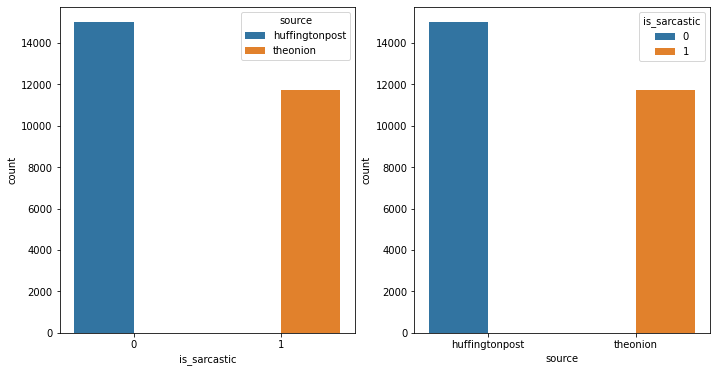

In [ ]:
plt.subplots(figsize= (18,6))
plt.subplot(131)
sns.countplot('is_sarcastic',hue = "source",data = df)
plt.subplot(132)
sns.countplot('source',hue= 'is_sarcastic',data = df)

### Pre-processing headline

In [ ]:
X_pre = df['headline']
y = df['is_sarcastic']

In [ ]:
from nltk.stem.porter import PorterStemmer

X = []

for i in range(0, len(X_pre)):
    headline = X_pre[i]
    # change all headline to lower digit
    headline = headline.lower()
    headline = headline.split()
    # Finding root word
    ps = PorterStemmer()
    headline = [ps.stem(word) for word in headline]
    headline = ' '.join(headline)
    X.append(headline)
X = np.array(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

### Pipeline train process 
### Feature engineering used: "Tf-Idf" 

In [ ]:
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer # bag-of-words 
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Logistic Regression model
text_lr_clf = Pipeline([
                         ('tfidf', TfidfVectorizer()), # tf-idf
                         ('clf', LogisticRegression())
                         ])
# Naive Bayes model
text_nb_clf = Pipeline([
                         ('tfidf', TfidfVectorizer()), # tf-idf
                         ('clf', BernoulliNB())
                         ])
# Support vector machine model
text_svm_clf = Pipeline([
                         ('tfidf', TfidfVectorizer()), # tf-idf
                         ('clf', LinearSVC())
                         ])
# Random Forest model
text_rf_clf = Pipeline([
                        ('tfidf', TfidfVectorizer()), # tf-idf
                        ('clf', RandomForestClassifier())
                        ]) 

# **IV. CHOOSE MODEL, TRAINING AND FINE TUNING**

In [ ]:
# Method for evaluate model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Training model

In [ ]:
text_lr_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
text_nb_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [ ]:
text_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
text_rf_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
# Predict with test set
pred_lr_clf = text_lr_clf.predict(X_test)
pred_nb_clf = text_nb_clf.predict(X_test)
pred_svm_clf = text_svm_clf.predict(X_test)
pred_rf_clf = text_rf_clf.predict(X_test)

In [ ]:
print("Logistic Regression\n",classification_report(y_test, pred_lr_clf))
print("\nNaive Bayes\n",classification_report(y_test, pred_nb_clf))
print("\nSupport Vector Machine\n",classification_report(y_test, pred_svm_clf))
print("\nRandom Forest\n",classification_report(y_test, pred_rf_clf))

Logistic Regression
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4485
           1       0.81      0.81      0.81      3528

    accuracy                           0.83      8013
   macro avg       0.83      0.83      0.83      8013
weighted avg       0.83      0.83      0.83      8013


Naive Bayes
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      4485
           1       0.85      0.78      0.81      3528

    accuracy                           0.84      8013
   macro avg       0.84      0.83      0.84      8013
weighted avg       0.84      0.84      0.84      8013


Support Vector Machine
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4485
           1       0.80      0.81      0.81      3528

    accuracy                           0.83      8013
   macro avg       0.83      0.83      0.83      8013
weighted avg  

### Fine tuning

**Because f1-score of Random Forest is lowest so we try to fine tuning parameters of this model with the hope we can increase the accurancy on the test set**

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [65]:
param_rf_grid = {"max_depth": [2,3, None],
              "n_estimators":[50,100,200,300,400,500],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
# Try with grid search parameters
text_rf_clf_tuning = Pipeline([
                        ('tfidf', TfidfVectorizer()), # tf-idf
                        ('clf', GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                                            param_grid = param_rf_grid,   
                                            scoring="accuracy",  #metrics
                                            cv = 3,              #cross-validation
                                            n_jobs = 1))   
                        ])

In [66]:
# Try with random search parameters
text_rf_clf_tuning = Pipeline([
                        ('tfidf', TfidfVectorizer()),  # tf-idf
                        ('clf', RandomizedSearchCV( estimator=RandomForestClassifier( random_state=0 ),
                                    param_distributions=param_rf_grid,
                                    cv=3,               #CV
                                    n_iter=1944,        #interation num
                                    scoring="accuracy", #metrics
                                    n_jobs=1,           #num of core
                                    verbose=0,          
                                    random_state=1))  
                        ])

In [ ]:
text_rf_clf_tuning.fit(X_train, y_train)

In [68]:
pred_rf_clf_tuning = text_rf_clf.predict(X_test)
print("\nRandom Forest\n",classification_report(y_test, pred_rf_clf_tuning))


Random Forest
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      4485
           1       0.78      0.79      0.78      3528

    accuracy                           0.81      8013
   macro avg       0.80      0.80      0.80      8013
weighted avg       0.81      0.81      0.81      8013



# **V. PREDICT INPUT HEADLINE**

In [ ]:
def predict_headline(headline, model):
    text = headline
    text = text.lower()
    text = text.split()
    
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    text = ' '.join(text) 
    text = [text]
    text = np.asarray(text)

    labels_pred = model.predict(text)
    if labels_pred==1:
        return "sarcasm"
    else:
        return 'not sarcasm'

In [ ]:
headline = input("Enter headline: ")
print ("Result of Logistic Regression model: Article of this headline is {}".format(predict_headline(headline, text_lr_clf)))
print ("Result of Naive Bayes model: Article of this headline is {}".format(predict_headline(headline, text_nb_clf)))
print ("Result of SVM model: Article of this headline is {}".format(predict_headline(headline, text_svm_clf)))
print ("Result of Random forest model: Article of this headline is {}".format(predict_headline(headline, text_rf_clf)))

Enter headline: Elderly Woman Wheeling Oxygen Tank Takes Over Bus’ Priority Seating Like Most Feared Inmate On Prison Yard
Result of Logistic Regression model: Article of this headline is sarcasm
Result of Naive Bayes model: Article of this headline is sarcasm
Result of SVM model: Article of this headline is sarcasm
Result of Random forest model: Article of this headline is sarcasm


# **VI. PERFORMANCE OF MODEL IN NEW DATASET AND COMMENT**

In [ ]:
# read new test dataset json in pandas
data_test = pd.read_json('Sarcasm_Headlines_test_set.json', lines=True)
# add new features to better understanding
data_test['source'] = data_test['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
data_test['len'] = data_test['headline'].apply(lambda x: len(x.split(' ')))
# df = df.drop('article_link',axis =1)
data_test.head()

,article_link,headline,is_sarcastic,source,len
0,https://www.theonion.com/mental-health-experts...,mental health experts warn veterans’ ptsd can ...,1,theonion,19
1,https://entertainment.theonion.com/amc-unveils...,amc unveils covid-19 guidelines requiring all ...,1,theonion,11
2,https://www.theonion.com/giant-sahara-desert-d...,giant sahara desert dust plume headed for u.s.,1,theonion,8
3,https://www.theonion.com/suburban-town-devasta...,suburban town devastated after only live perfo...,1,theonion,9
4,https://www.theonion.com/bayer-to-pay-10-billi...,bayer to pay $10 billion in roundup settlement,1,theonion,8


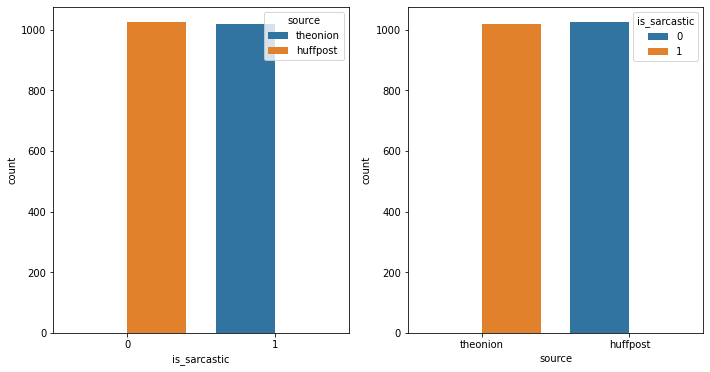

In [ ]:
plt.subplots(figsize= (18,6))
plt.subplot(131)
sns.countplot('is_sarcastic',hue = "source",data = data_test)
plt.subplot(132)
sns.countplot('source',hue= 'is_sarcastic',data = data_test)

In [ ]:
X_new_test_pre = data_test['headline']
y_new_test = data_test['is_sarcastic']

In [ ]:
from nltk.stem.porter import PorterStemmer

X_new_test = []

for i in range(0, len(X_new_test_pre)):
    headline = X_new_test_pre[i]
    # change all headline to lower digit
    headline = headline.lower()
    headline = headline.split()
    # Finding root word
    ps = PorterStemmer()
    headline = [ps.stem(word) for word in headline]
    headline = ' '.join(headline)
    X_new_test.append(headline)
X_new_test = np.array(X_new_test)

In [ ]:
# Predict with test set
pred_lr_clf_new_dataset = text_lr_clf.predict(X_new_test)
pred_nb_clf_new_dataset= text_nb_clf.predict(X_new_test)
pred_svm_clf_new_dataset = text_svm_clf.predict(X_new_test)
pred_rf_clf_new_dataset = text_rf_clf.predict(X_new_test)

In [ ]:
print("Logistic Regression\n",classification_report(y_new_test, pred_lr_clf_new_dataset))
print("\nNaive Bayes\n",classification_report(y_new_test, pred_nb_clf_new_dataset))
print("\nSupport Vector Machine\n",classification_report(y_new_test, pred_svm_clf_new_dataset))
print("\nRandom Forest\n",classification_report(y_new_test, pred_rf_clf_new_dataset))

Logistic Regression
               precision    recall  f1-score   support

           0       0.64      0.83      0.72      1024
           1       0.76      0.54      0.63      1018

    accuracy                           0.68      2042
   macro avg       0.70      0.68      0.68      2042
weighted avg       0.70      0.68      0.68      2042


Naive Bayes
               precision    recall  f1-score   support

           0       0.66      0.87      0.75      1024
           1       0.80      0.54      0.65      1018

    accuracy                           0.70      2042
   macro avg       0.73      0.70      0.70      2042
weighted avg       0.73      0.70      0.70      2042


Support Vector Machine
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      1024
           1       0.74      0.56      0.64      1018

    accuracy                           0.68      2042
   macro avg       0.70      0.68      0.68      2042
weighted avg  

## **Comments**


- In the training set, Naive Bayes for multivariate Bernoulli models retrun the best accuracy of the 4 installed models
- The accurancy of models in test set which is splited from training set, is lager than the newly collected test set. Because we future engineering by calculating the probability of the word appearing in the training set, so some important words of the headlines haven't large occurencce frequency in the new test set.
- The models is unrealistic, because the models don't description semantic of the news headlines however it seems remember headlines, classify them and predict it's sarcasm or not.
- Further improvement, we want to learn and build data structures or algorithms that can describe the meaning of headlines and that is the best way to improve the predicted results of the problem. In addition, we have just begun to study this field, so we are lack of knowledge in feature extraction and modeling.